In [1]:
import numpy as np
import cv2
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select only digits 0, 1, and 2
X_train = X_train[y_train < 3]
y_train = y_train[y_train < 3]
X_test = X_test[y_test < 3]
y_test = y_test[y_test < 3]

In [3]:
# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# Calculate Hu moments for each image
def calculate_hu_moments(images):
    hu_moments = []
    for img in images:
        moments = cv2.moments(img)
        hu_moment = cv2.HuMoments(moments)
        hu_moments.append(hu_moment.flatten())
    return np.array(hu_moments)

X_train_hu = calculate_hu_moments(X_train)
X_test_hu = calculate_hu_moments(X_test)

# Concatenate Hu moments with flattened images
X_train_features = np.column_stack((X_train.reshape(X_train.shape[0], -1), X_train_hu))
X_test_features = np.column_stack((X_test.reshape(X_test.shape[0], -1), X_test_hu))

In [6]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_features, np.argmax(y_train, axis=1))

RandomForestClassifier(random_state=42)

In [8]:
# Evaluate the model
y_pred = model.predict(X_test_features)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))

Accuracy: 0.9933269780743565
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147



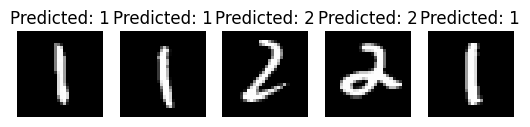

In [11]:
# Select some random images
random_indices = np.random.choice(len(X_test), 5, replace=False)
random_images = X_test[random_indices]
random_labels = y_test[random_indices]

# Predict labels for these images
random_pred = model.predict(X_test_features[random_indices])

# Visualize images with their predicted labels
for i in range(len(random_images)):
    plt.subplot(1, len(random_images), i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"Predicted: {random_pred[i]}")
    plt.axis('off')

plt.show()
